In [1]:
import numpy as np

from dataprovider3 import Dataset
from dataprovider3 import emio

In [2]:
import os

data_dir = '~/Data_local/datasets/Superhuman'
data_dir = os.path.expanduser(data_dir)

# Image
fname = os.path.join(data_dir, 'train_img.h5')
img = emio.imread(fname)
img = (img/255.0).astype(np.float32)

# Segmentation
fname = os.path.join(data_dir, 'train_seg.h5')
seg = emio.imread(fname)

# Mask
fname = os.path.join(data_dir, 'train_msk.h5')
msk = emio.imread(fname)

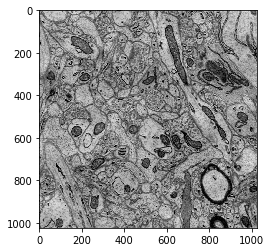

In [3]:
import matplotlib.pyplot as plt

z = 50

# plt.figure(figsize=(10, 10), dpi= 80)
plt.imshow(img[z,:,:], cmap='gray')
plt.show()

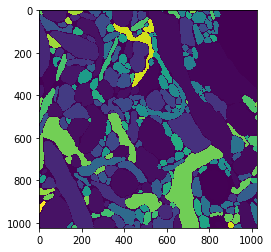

In [4]:
# plt.figure(figsize=(10, 10), dpi= 80)
plt.imshow(seg[z,:,:])
plt.show()

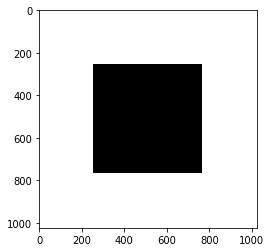

In [5]:
# plt.figure(figsize=(10, 10), dpi= 80)
plt.imshow(msk[z,:,:], cmap='gray')
plt.show()

In [6]:
dset = Dataset()
dset.add_data('img', img)
dset.add_data('seg', seg)
dset.add_mask('msk', msk, loc=True)

In [7]:
spec = dict(img=(32,160,160), seg=(32,160,160))
sample = dset.random_sample(spec=spec)

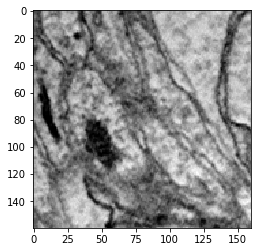

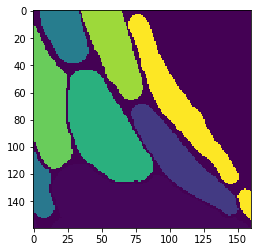

In [8]:
plt.imshow(sample['img'][0,0,:,:], cmap='gray')
plt.show()

plt.imshow(sample['seg'][0,0,:,:])
plt.show()

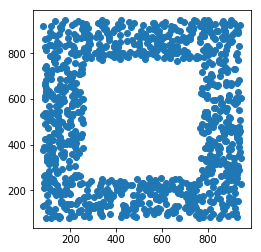

In [9]:
# Fixing random state for reproducibility
np.random.seed(19680801)

xs, ys, zs = [], [], []
for _ in range(1000):
    loc = dset._random_location(spec=spec)
    xs.append(loc[2])
    ys.append(loc[1])
    zs.append(loc[0])

fig = plt.figure()
ax = fig.add_subplot(111)
    
ax.scatter(xs, ys)
ax.set_aspect('equal')

plt.show()